# Final Project Team 5

<h4>Sushrut Mujumdar - 001563244 </h4>
<h4> Tarun Palakaru - 001586111 </h4>
<h4> Yash Jain - 001521876 </h4>

<h3>Problem Statement</h3>

<h2>Climate Change:</h2>

Climate change/ global warming has led to the emergence of large-scale environmental hazards to human health; such as extreme weather, increased danger of wildfires, loss of biodiversity, stresses to food-producing systems, and the global spread of infectious diseases.

<br/>
<center>
<img src="Images/leod.webp" width="450" />
</center>

<h2>Abstract</h2>

<strong>Outcomes of the Glasgow Climate Change Conference</strong><br>
Nations took a range of decisions in the collective effort to limit global temperature rise to 1.5 degrees. <br>
Aiming to turn the 2020s into a decade of climate action and support.<br/>


To Keep in line with the goals of COP26, we researched for a dataset that could provide us with a large dataset size with average temperatures of different cities during a specific time frame.<br/>


We start off with <strong>EDA</strong> on the data downloaded.<br/>


Next we make the data <strong>stationary</strong> to eliminate trends for good modelling. <br/>


We will then build an <strong>Autoregressive integrated moving average</strong> or ARIMA model to forecast the Avg_Temp over the next 5 years to check if we are on track towards the COP26 goal of limiting the global temperature rise to 1.5 degrees

### What you can expect from today's notebook???

<br/>
<center>
<img src="Images/thinking.gif" width="450" />
</center>

1. Why is Time-Series analysis important? 
2. What is Time-Series?
3. Component of Time Series 
4. When not to use Time-Series?
5. What is stationary and why?
6. Arima Model 

### What is Time-Series?

Time series is a sequence of data points recorded in time order, often taken at successive equally spaced points in time. Time series data can be taken yearly, monthly, weekly, hourly, or even by the minute.

Time Series Analysis comprised methods for analyzing time-series data to extract meaningful statistics and other characteristics of the data. It is different from Time Series forecasting which is the use of a model to predict future values based on previously observed values. While time series analysis is mostly statistics, time series forecasting enters Machine Learning. Time series analysis is a preparatory step to time series forecasting.

### Why is Time-Series analysis important?

Because time series forecasting is important! Business forecasting, understanding past behavior, and planning for the future especially for policymakers heavily rely on time series analysis.

<br/>
<center>
<img src="Images/timeseries.gif" width="500" />
</center>

#### Component of Time Series 

These four components are:

+ Secular trend, which describes the movement along with the term;
+ Seasonal variations, which represent seasonal changes;
+ Cyclical fluctuations, which correspond to periodical but not seasonal variations;
+ Irregular variations, which are other nonrandom sources of variations of series.

#### When not to use Time-Series?

<br/>
<center>
<img src="Images/nottouse.png" width="700" />
</center>
<br/>

+ When the values are constant-This means they are not dependent on time so 1, the data is not time series data and 2 it is pointless as the values never change.
+ Values in the form of a function - For example sin x, cos x, etc.

<br/>
<center>
<img src="Images/letsstart.gif" width="500" />
</center>
<br/>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

##### Loading global temperature dataset

In [2]:
temp = pd.read_csv('./dataset.csv')

In [3]:
temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,NaN,Algiers,1,1,2020,46.3,1-1-2020
1,Africa,Algeria,NaN,Algiers,1,2,2020,45.4,2-1-2020
2,Africa,Algeria,NaN,Algiers,1,3,2020,48.0,3-1-2020
3,Africa,Algeria,NaN,Algiers,1,4,2020,53.4,4-1-2020
4,Africa,Algeria,NaN,Algiers,1,5,2020,47.3,5-1-2020


Checking of all the datatype

In [4]:
temp.dtypes

Region             object
Country            object
State             float64
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
Date               object
dtype: object

In [5]:
temp.shape

(1048575, 9)

## Data Cleaning

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

###### What is an outlier?
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Dropping **unwanted** columns from dataset 

In [6]:
temp = temp.drop(columns=["State", "Day", "Month", "Country", "City"])
temp

,Region,Year,AvgTemperature,Date
0,Africa,2020,46.3,1-1-2020
1,Africa,2020,45.4,2-1-2020
2,Africa,2020,48.0,3-1-2020
3,Africa,2020,53.4,4-1-2020
4,Africa,2020,47.3,5-1-2020
...,...,...,...,...
1048570,Europe,200,-99.0,27-12-200
1048571,Europe,200,-99.0,28-12-200
1048572,Europe,200,-99.0,29-12-200
1048573,Europe,200,-99.0,30-12-200


Checking if any **null value outliers** need to be removed

In [7]:
temp.isnull().sum()

Region            0
Year              0
AvgTemperature    0
Date              0
dtype: int64

Making the three new columns in the temp table namely **X-mean**,**1.96 * std**, and **Outlier**

In **X-mean** we are storing the difference between values of each column and the mean of the entire column.

In the **1.96 * std** column, we are storing data by multiplying the standard deviation of each column by 1.96 (i.e. approximate value of the 97.5 percentile point of the standard normal distribution.)

In the ***Outlier*** column, we are checking if the value of **X-mean** is greater than **1.96 * std** then the data is outlier else not.

In [8]:
temp['X-Mean'] = abs(temp['AvgTemperature'] - temp['AvgTemperature'].mean())
temp['1.96 * std'] = 1.96 * temp['AvgTemperature'].std()
temp['Outlier'] = temp['X-Mean'] > temp['1.96 * std']

**Dropping** the rows in temp table whose **Outlier** values is **true**

In [9]:
temp = temp.loc[temp['Outlier']== False]

In [10]:
temp.shape

(992003, 7)

In [11]:
## rename of column
temp.rename(columns = 
            {
             'AvgTemperature':'Avg_temp'
            }, inplace=True)

In [12]:
temp.head()

,Region,Year,Avg_temp,Date,X-Mean,1.96 * std,Outlier
0,Africa,2020,46.3,1-1-2020,8.367848,79.690012,False
1,Africa,2020,45.4,2-1-2020,9.267848,79.690012,False
2,Africa,2020,48.0,3-1-2020,6.667848,79.690012,False
3,Africa,2020,53.4,4-1-2020,1.267848,79.690012,False
4,Africa,2020,47.3,5-1-2020,7.367848,79.690012,False


In [13]:
# Removing unwanted columns
temp = temp.drop(columns=["X-Mean", "1.96 * std", "Outlier"])
temp

,Region,Year,Avg_temp,Date
0,Africa,2020,46.3,1-1-2020
1,Africa,2020,45.4,2-1-2020
2,Africa,2020,48.0,3-1-2020
3,Africa,2020,53.4,4-1-2020
4,Africa,2020,47.3,5-1-2020
...,...,...,...,...
1047798,Middle East,1995,60.9,31-12-1995
1047907,Middle East,1995,82.8,19-4-1995
1048065,Middle East,1995,94.5,24-9-1995
1048066,Middle East,1995,92.6,25-9-1995


In [14]:
# Setting date as index of the table
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01',
               ...
               '1995-12-26', '1995-12-27', '1995-12-28', '1995-12-29',
               '1995-12-30', '1995-12-31', '1995-04-19', '1995-09-24',
               '1995-09-25', '1995-01-10'],
              dtype='datetime64[ns]', name='Date', length=992003, freq=None)

In [15]:
temp.describe()

,Year,Avg_temp
count,992003.000000,992003.000000
mean,2007.090161,63.425031
std,7.276367,18.041225
min,1995.000000,-25.000000
25%,2001.000000,51.600000
50%,2007.000000,66.000000
75%,2013.000000,78.700000
max,2020.000000,110.000000


In [16]:
#Taking data from 1995 to 2019 for analysis
latest_temp_data = temp.loc['1995':'2019']
latest_temp_data.head()

,Region,Year,Avg_temp
Date,,,
2019-01-01,Africa,2019,50.6
2019-02-01,Africa,2019,49.9
2019-03-01,Africa,2019,50.9
2019-04-01,Africa,2019,50.6
2019-05-01,Africa,2019,49.7


In [17]:
# Grouping the data based on the region
latest_temp_data[['Region','Avg_temp']].groupby(['Region']).mean().sort_values('Avg_temp')

,Avg_temp
Region,
Europe,52.038714
Australia/South Pacific,62.217824
Asia,68.228770
Middle East,73.927026
Africa,74.390962


<br/>
<center>
<img src="Images/dataclean.gif" width="500" />
</center>
<br/>

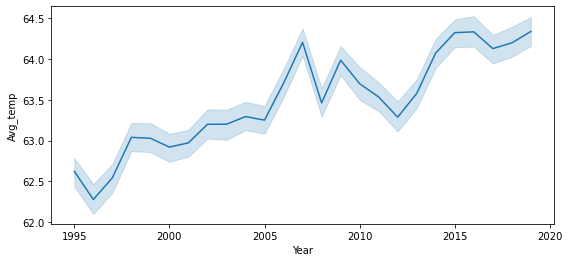

In [18]:
#plotting:
plt.figure(figsize=(9,4))
sns.lineplot(x='Year', y='Avg_temp', data=latest_temp_data)
plt.show()

In [19]:
# Resampling annual data
resample_temp = latest_temp_data[['Avg_temp']].resample('A').mean()

In [20]:
resample_temp.head()

,Avg_temp
Date,
1995-12-31,62.621505
1996-12-31,62.274865
1997-12-31,62.541204
1998-12-31,63.038620
1999-12-31,63.027891


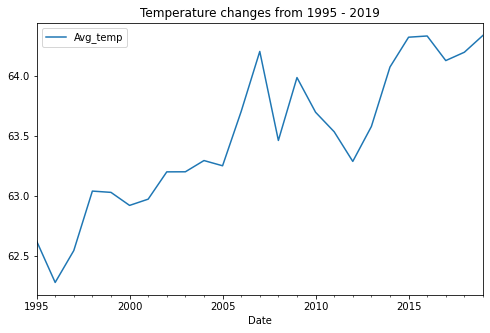

In [21]:
resample_temp.plot(title='Temperature changes from 1995 - 2019', figsize=(8,5))
plt.ylabel=('Temperature')
plt.xlabel=('Year')
plt.legend()

<h2>What is stationary and why?</h2>

A time series has stationarity if a shift in time doesn’t cause a change in the shape of the distribution. Basic properties of the distribution like the mean, variance, and covariance are constant over time.

Most forecasting methods assume that distribution has stationarity. For example, autocovariance and autocorrelations rely on the assumption of stationarity. An absence of stationarity can cause unexpected or bizarre behaviors, like t-ratios not following t-distribution or high r-squared values assigned to variables that aren’t correlated at all.



<h4>Dickey-Fuller test (ADCF)</h4>

An augmented Dickey-Fuller test (ADCF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used but is usually stationarity or trend-stationarity.



<h4>Null Hypothesis</h4>

The null hypothesis (often denoted H0) is that there is no difference between the two possibilities.


To perform the ADF test in any time series package, the stats model provides the implementation function adfuller().

Function adfuller() provides the following information.

+ p-value

+ Value of the test statistic

+ Number of lags for testing consideration

+ The critical values

+ Number of observation used

In the Dickey-Fuller test for auto lag, we are using the **Akaike information criterion (AIC)**. AIC gives use the information that you want in the time series the exact value and the actual value and analyses the difference between them.

In [22]:
# Perform Dickey-Fuller Test
print('Results of Dickey-Fuller Test:')

test_temp = adfuller(resample_temp['Avg_temp'], autolag='AIC')
temp_output = pd.Series(test_temp[:4], index=['Test Statistics','p-value','Lag Used','Number of Observation Used'])
for key, value in test_temp[4].items():
    temp_output['Critical Value (%s)' %key] = value
print(temp_output)

Results of Dickey-Fuller Test:
Test Statistics               -1.330100
p-value                        0.615292
Lag Used                       0.000000
Number of Observation Used    24.000000
Critical Value (1%)           -3.737709
Critical Value (5%)           -2.992216
Critical Value (10%)          -2.635747
dtype: float64


We are taking the log of the resample data

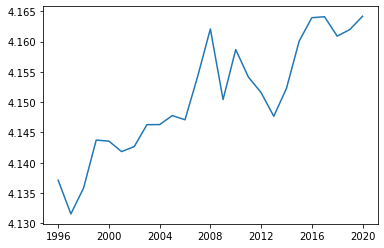

In [23]:
#Estimating trend

resample_temp_logScale = np.log(resample_temp)
plt.plot(resample_temp_logScale)

<h3>Moving Average</h3>

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.



<h3>Moving Standard Deviation</h3>

Standard deviation is a statistical term that provides a good indication of volatility. It measures how widely values are dispersed from the average. Dispersion is the difference between the actual value and the average value. The larger the difference between the values and the average value, the higher the standard deviation will be and the higher the volatility. The closer the actual value is to the average value, the lower the standard deviation and the lower the volatility.

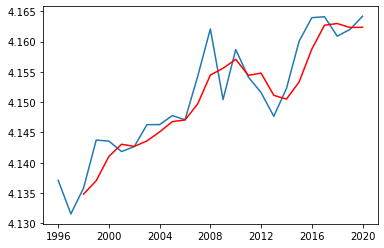

In [24]:
movingAverage = resample_temp_logScale.rolling(window = 3).mean()
movingSTD = resample_temp_logScale.rolling(window = 3).std()
plt.plot(resample_temp_logScale)
plt.plot(movingAverage, color='red')

From the above plot, we can conclude that the **mean** is non-stationary as it moves with time and has an **upward trend**.

We are taking the difference between the log dataset and the moving average. The purpose of doing this all transformation is to prove that the dataset is stationary without this transformation we will not able to prove it.

In [25]:
#Data Transformation
resampleLogScaleMinusMovingAverage = resample_temp_logScale - movingAverage
resampleLogScaleMinusMovingAverage.head(10)

,Avg_temp
Date,
1995-12-31,NaN
1996-12-31,NaN
1997-12-31,0.000995
1998-12-31,0.006704
1999-12-31,0.002527
2000-12-31,-0.001210
2001-12-31,-0.000023
2002-12-31,0.002688
2003-12-31,0.001212


In [26]:
#Remove NaN Values
resampleLogScaleMinusMovingAverage.dropna(inplace = True)
resampleLogScaleMinusMovingAverage.head(10)

,Avg_temp
Date,
1997-12-31,0.000995
1998-12-31,0.006704
1999-12-31,0.002527
2000-12-31,-0.001210
2001-12-31,-0.000023
2002-12-31,0.002688
2003-12-31,0.001212
2004-12-31,0.000993
2005-12-31,0.000035


In [27]:
# Dickey-Fuller testing function
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')

    temp_data = adfuller(timeseries, autolag = 'AIC')
    temp_output = pd.Series(temp_data[:4], index=['Test Statistics','p-value','Lag Used','Number of Observation Used'])
    for key, value in test_temp[4].items():
        temp_output['Critical Value (%s)' %key] = value
    print(temp_output)

In [28]:
test_stationarity(resampleLogScaleMinusMovingAverage)

Results of Dickey-Fuller Test:
Test Statistics               -3.914394
p-value                        0.001931
Lag Used                       0.000000
Number of Observation Used    22.000000
Critical Value (1%)           -3.737709
Critical Value (5%)           -2.992216
Critical Value (10%)          -2.635747
dtype: float64


<center>
<img src="Images/yes.gif" width="300" />
</center>

Calculate the weighted average of time series why we have done this is because we need to see the trend that is present inside the time series.

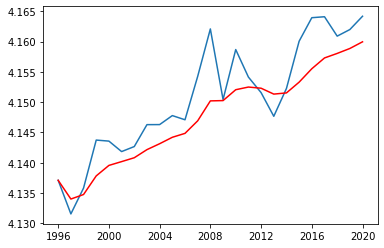

In [29]:
expDecayWeightAverage = resample_temp_logScale.ewm(halflife=3, min_periods=0, adjust=True).mean()
plt.plot(resample_temp_logScale)
plt.plot(expDecayWeightAverage, color='red')

As you can see here as the time series is progressive the average is also progressing towards the higher side so here is your trend is upwards and keep on increasing with time.

We are shifting the value in time series so we can use the data for forecasting. 

So what we have done earlier we have subtracted the value of mean from the actual value. 

Now what we will do we will use the function called to shift to shift all of those values.

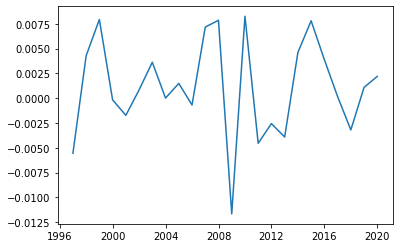

In [30]:
# Data Shifting for forecasting
tempsetLogDiffShifting = resample_temp_logScale - resample_temp_logScale.shift()

plt.plot(tempsetLogDiffShifting)

Here we have taken a lag of 1 so here we have shifted the value by 1 or you can say difference the time series by 1.

For ARIMA model has three models in it i.e. AR model stands for autoregressive, the MA model stands for moving average and the I model stands for integration.

So ARIMA model takes three parameters and **d** stands for integration part or you can say how many times you have differentiated a time series so here the value is **1**

In [31]:
## Remove NaN values
tempsetLogDiffShifting.dropna(inplace=True)
test_stationarity(tempsetLogDiffShifting)

Results of Dickey-Fuller Test:
Test Statistics              -6.041363e+00
p-value                       1.343549e-07
Lag Used                      0.000000e+00
Number of Observation Used    2.300000e+01
Critical Value (1%)          -3.737709e+00
Critical Value (5%)          -2.992216e+00
Critical Value (10%)         -2.635747e+00
dtype: float64


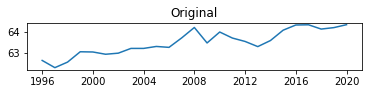

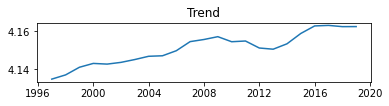

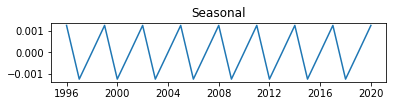

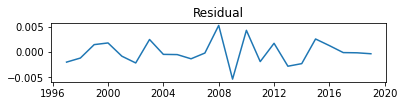

<Figure size 432x360 with 0 Axes>

In [32]:
# Component of time series
decomp = seasonal_decompose(resample_temp_logScale, freq=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(resample_temp)
plt.title('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.title('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.title('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

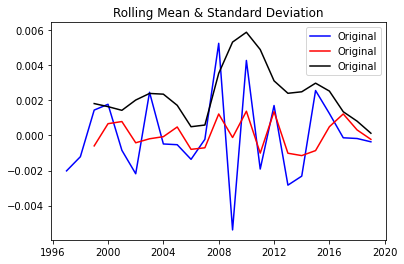

Results of Dickey-Fuller Test:
Test Statistics               -5.127845
p-value                        0.000012
Lag Used                       6.000000
Number of Observation Used    16.000000
Critical Value (1%)           -3.737709
Critical Value (5%)           -2.992216
Critical Value (10%)          -2.635747
dtype: float64


In [33]:
# Check noise in the data if its stationary or not
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

#Plotting
movingAverage = decomposedLogData.rolling(window=3).mean()
movingSTD = decomposedLogData.rolling(window=3).std()

orig = plt.plot(decomposedLogData, color = 'blue' , label = 'Original')
mean = plt.plot(movingAverage, color = 'red' , label = 'Original')
std = plt.plot(movingSTD, color = 'black' , label = 'Original')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

# Testing Stationary
test_stationarity(decomposedLogData)

Looking at the graph we can see this is not stationary so we need to have a moving average parameter in place so that it smoothes it out and predict what happens next.

Now we are plotting the Auto correlation graph (ACF) and Partial Autocorrelation graph (PACF) to find the two remaining parameters of the ARIMA model. 

For PACF we are using **Ordinary least square method (ols)**.

In order to find **p** and **q** values we need to check where the graph drops to zero for the first time.

+ **p** value can be found by PACF
+ **q** value can be found by ACF

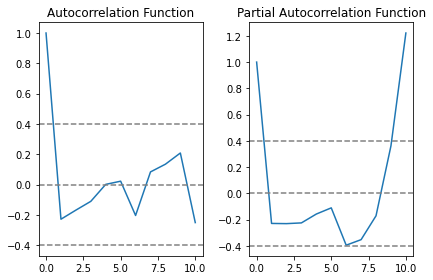

In [34]:
#ACF and PACF plot:

lag_acf = acf(tempsetLogDiffShifting, nlags=10)
lag_pacf = pacf(tempsetLogDiffShifting, nlags=10, method='ols')

#plot acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= -1.96/np.sqrt(len(tempsetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(tempsetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= -1.96/np.sqrt(len(tempsetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(tempsetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

For the graph, we can see that **p** and **q** values is also around **2**.

<h2>ARIMA</h2> 

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), <br>

where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).<br>

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

<br/>
<center>
<img src="Images/arima.png" width="590" />
</center>
<br/>

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**Autoregression (AR) :** A model that uses the dependent relationship between an observation and some number of lagged observations.

**Integrated (I) :** The use of differencing of raw observations (e.g. subtracting an observation from observation at the previous time step) in order to make the time series stationary.

**Moving Average (MA) :** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

The parameters of the ARIMA model are defined as follows:

**p:** The number of lag observations included in the model, also called the lag order. 

**d:** The number of times that the raw observations are differenced, also called the degree of differencing. 

**q:** The size of the moving average window, also called the order of moving average.

Plotting AR model


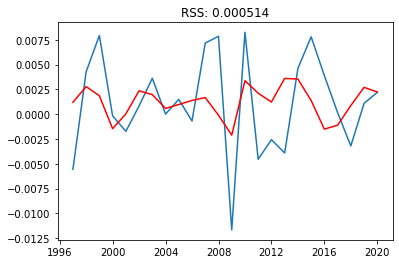

In [35]:
#AR Model
model = ARIMA(resample_temp_logScale, order=(2, 1, 0))
result_AR = model.fit(dis=-1)
plt.plot(tempsetLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %4f' %sum((result_AR.fittedvalues - tempsetLogDiffShifting['Avg_temp']) **2 ))
print('Plotting AR model')

Plotting MA model


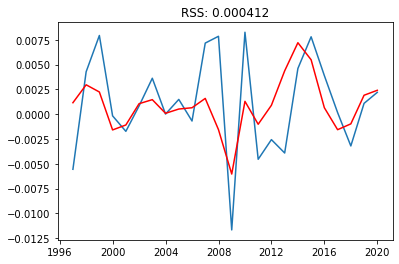

In [36]:
#MA Model
model = ARIMA(resample_temp_logScale, order=(0, 1, 2))
result_MA = model.fit(dis=-1)
plt.plot(tempsetLogDiffShifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %4f' %sum((result_MA.fittedvalues - tempsetLogDiffShifting['Avg_temp']) **2 ))
print('Plotting MA model')

We can conclude that we respect to the **Auto Regressive** part we have RSS of **0.000387** and for **Moving average** is **0.000412** and if we combined both of them and make ARIMA out of them i.e. 2, 1, 2 then we have less RSS value.

Plotting AR model


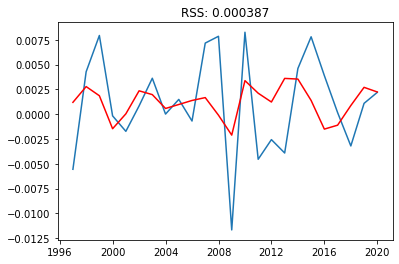

In [37]:
model = ARIMA(resample_temp_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(dis=-1)
plt.plot(tempsetLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %4f' %sum((results_ARIMA.fittedvalues - tempsetLogDiffShifting['Avg_temp']) **2 ))
print('Plotting AR model')

Coverted the fitted value in series format

In [38]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1996-12-31    0.001114
1997-12-31    0.002548
1998-12-31    0.001859
1999-12-31   -0.000465
2000-12-31   -0.000390
Freq: A-DEC, dtype: float64


In [39]:
# convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1996-12-31    0.001114
1997-12-31    0.003662
1998-12-31    0.005521
1999-12-31    0.005056
2000-12-31    0.004666
Freq: A-DEC, dtype: float64


In [40]:
# Prediction done for the fitted value
predictions_ARIMA_log = pd.Series(resample_temp_logScale['Avg_temp'], index=resample_temp_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
1995-12-31    4.137109
1996-12-31    4.132672
1997-12-31    4.139488
1998-12-31    4.149268
1999-12-31    4.148634
Freq: A-DEC, dtype: float64

After all this transformation we also need exponential of the whole dataset so that it comes back to its original form.

This are the three step very important for data transformation
+ Finding cumulative sum
+ Doing Prediction
+ Calculate exponent of it to get your data in your original format

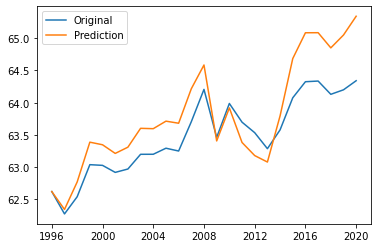

In [41]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(resample_temp, label='Original')
plt.plot(predictions_ARIMA, label='Prediction')
plt.legend(loc='best')
plt.show(block=False)

As you can see only the magnitude is varying and the shape is properly captured by the ARIMA model.

In [42]:
resample_temp_logScale.shape

(25, 1)

You can see they are 25 rows in the dataset to predict for the next 10 years so the number of data points will be 10. So using **plot_predict** we can predict the future.

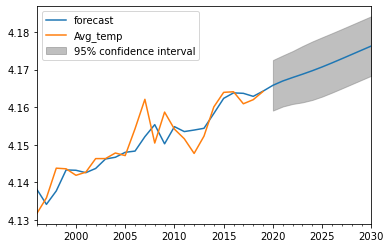

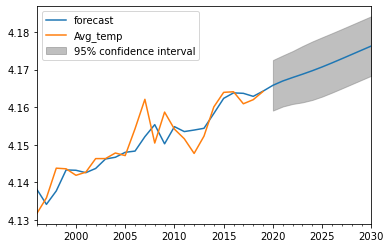

In [43]:
results_ARIMA.plot_predict(1, 35)

<center>
<img src="Images/giphy.gif" width="450" />
</center>
<br>
You can see the blue is the forecast value and gray part is the confidence.

<h3>Conclusion:</h3>

We have walked through a python tutorial and learned the **why and what Time Series** is, **components of time-series**, What is **Stationarity**, and **making stationary data using the dickey-fuller test** and **ARIMA model** while implementing weather forecasting of the world data. If we thoroughly review the temperature prediction graph, the temperature of the world is rising at a high rate. 

<br/>
<center>
<img src="Images/predict.gif" width="450" />
</center>

Soooo.... we are lagging in a timeline but it's not finished yet. So let's do some action to save the earth from raising the temperature.


<h3>Citations:</h3>

Referred code and knowledge from the following links:

**Dataset:** https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities/metadata

**Dickey-Fuller Test:** https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

**ARIMA:** https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

**Credit:** Prof. Dino, Gauri Verma & Pratiksha Patole

<br/>
<center>
<img src="Images/thankyou.gif" width="350" />
</center>